In [63]:
import pandas as pd
import seaborn as sns

In [86]:
df = pd.read_csv("ILI_2009_2010.csv")
df

,index,Release_Week,Region,Week,Sites_Reporting,Total_Patient_Visits,Total_ILI,Perc_Unweighted_ILI,Perc_Weighted_ILI
0,0,949,Region 1,200935,96,64093,257,0.40100,0.62755
1,1,949,Region 1,200936,96,53552,265,0.49480,0.83766
2,2,949,Region 1,200937,99,73590,478,0.64950,1.04911
3,3,949,Region 1,200938,101,76099,622,0.81740,1.06889
4,4,949,Region 1,200939,102,73743,614,0.83260,1.16454
...,...,...,...,...,...,...,...,...,...
305,305,950,Region 10,200946,59,15546,450,2.89464,2.95378
306,306,950,Region 10,200947,56,9422,216,2.29251,2.34079
307,307,950,Region 10,200948,54,14150,268,1.89399,1.63349
308,308,950,Region 10,200949,48,10527,176,1.67189,1.39328


## Data Spiliting

In [87]:
# Release Week, Week, Sites Reporting menjadi feature
# Region menjadi Target
X = df[['Release_Week','Week','Sites_Reporting']]
Y = df['Region']

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=0)

## Alogritma Klasifikasi

### KKN

In [90]:
from sklearn.neighbors import KNeighborsClassifier


In [91]:
modelKNN = KNeighborsClassifier(n_neighbors = 5)

In [92]:
modelKNN.fit(X_train, Y_train)

KNeighborsClassifier()

### Akurasi testing

In [93]:
modelKNN.score(X_test, Y_test)

0.8548387096774194

### Prediksi

In [94]:
song =[[2.4,3.3,5]]
modelKNN.predict(song)

C:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Region 10'], dtype=object)

### Decesion Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
modelDT = DecisionTreeClassifier().fit(X_train,Y_train)

#### Akurasi

In [97]:
modelDT.score(X_test,Y_test)

0.8709677419354839

#### Prediksi

In [98]:
song =[[2.4,3.3,5]]
modelDT.predict(song)

C:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Region 10'], dtype=object)

## Perbandingan akurasi dari kedua alogritma

In [99]:
print ("Perbandingan Akurasi Training Set")
print ("Akurasi training set dengan menggunakan KNN : ",modelKNN.score(X_train, Y_train))
print ("Akurasi training set dengan menggunakan Decesion Tree : ",modelDT.score(X_train, Y_train))

Perbandingan Akurasi Training Set
Akurasi training set dengan menggunakan KNN :  0.8185483870967742
Akurasi training set dengan menggunakan Decesion Tree :  0.9879032258064516


In [100]:
print ("Perbandingan Akurasi Testing Set")
print ("Akurasi training set dengan menggunakan KNN: ",modelKNN.score(X_test, Y_test))
print ("Akurasi training set dengan menggunakan Decesion Tree : ",modelDT.score(X_test, Y_test))

Perbandingan Akurasi Testing Set
Akurasi training set dengan menggunakan KNN:  0.8548387096774194
Akurasi training set dengan menggunakan Decesion Tree :  0.8709677419354839


## Visualisasi Data Decesion Tree

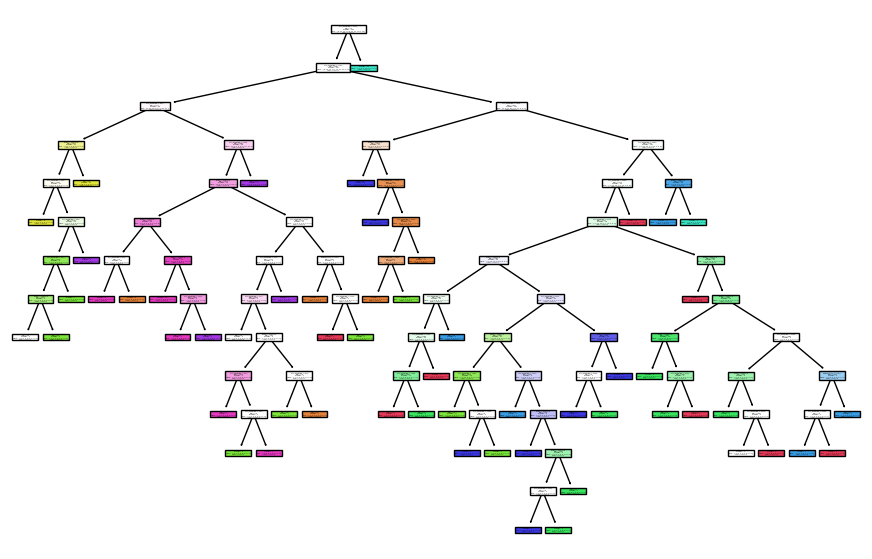

In [111]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(11,7))
tree.plot_tree(modelDT,feature_names=X.columns,filled=True,class_names=Y.unique())
plt.show()